In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [3]:
home_folder = '/nethome/manra003/analysis/dispersion/simulations/'

# ds3D=xr.open_zarr(home_folder+'Fwd_3D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# ds2D=xr.open_zarr(home_folder+'Fwd_2D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
# dsdvm=xr.open_zarr(home_folder+'Fwd_DVM_Luderitz_117x117_Nov01-31_2017_1z_100days.zarr')
ds2D = xr.open_zarr(home_folder + "Fwd_2D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")
ds3D = xr.open_zarr(home_folder + "Fwd_3D_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr")  
dsdvm = xr.open_zarr(home_folder + "Fwd_DVM_Jul2023_BenguelaUpwR_117x117_Dec2017_1z_100days.zarr") 

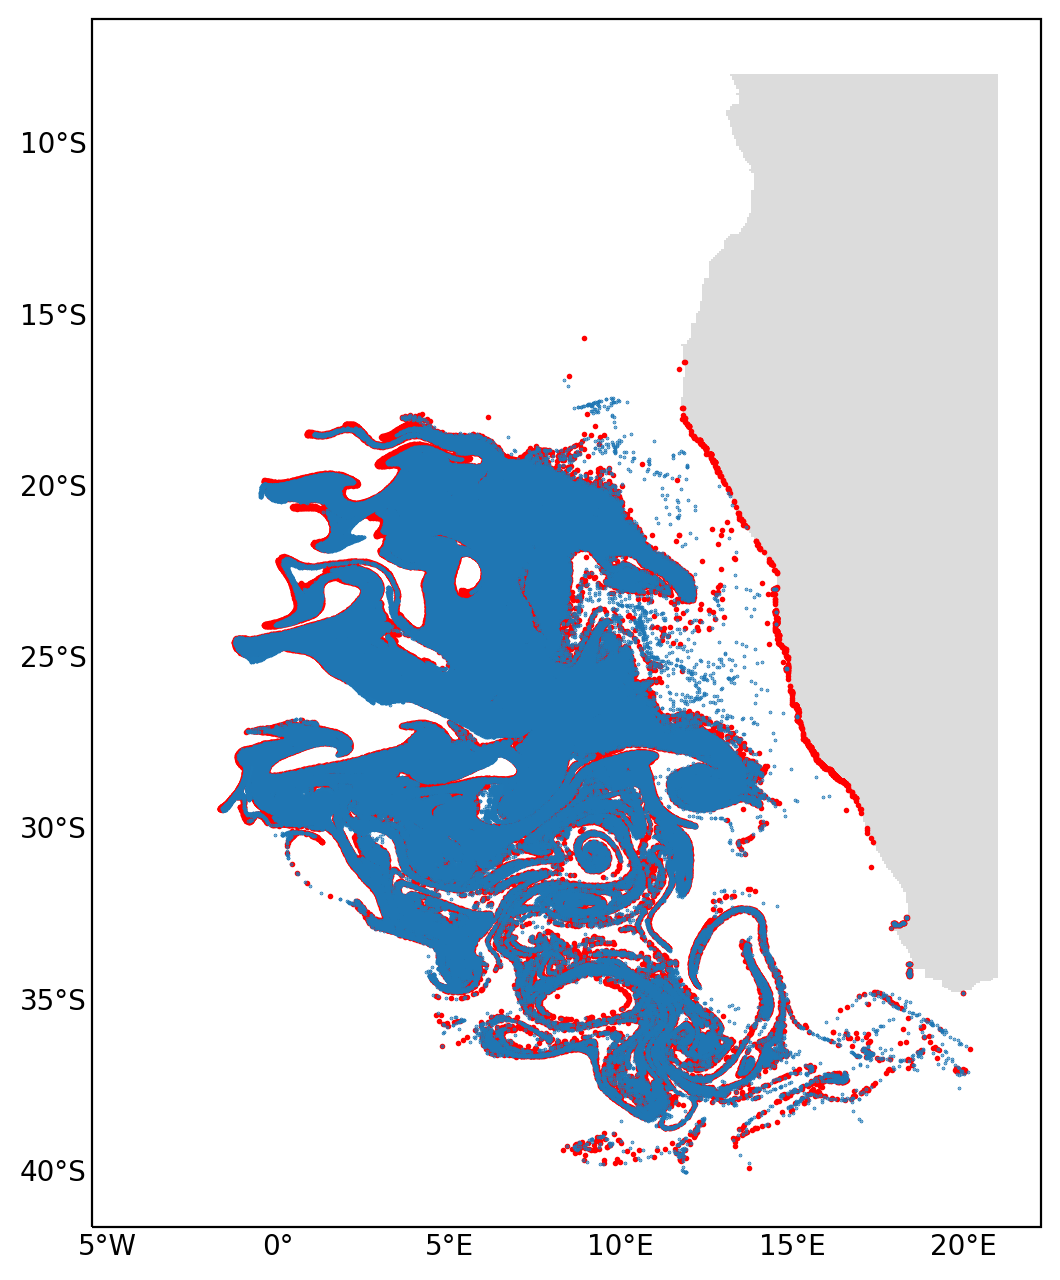

In [4]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(3,12)
# ax.set_ylim(-30,-20)
# ax.set_xlim(10,16)
# ax.set_ylim(-30,-21)
t_step=99
ax.scatter(ds2D['lon'][:,t_step], ds2D['lat'][:,t_step], s=1, c='red')
ax.scatter(ds3D['lon'][:,t_step], ds3D['lat'][:,t_step], s=0.1)
# ax.scatter(ds3D['lon'][:,0], ds3D['lat'][:,0], s=0.001, c='orange')

plt.show()

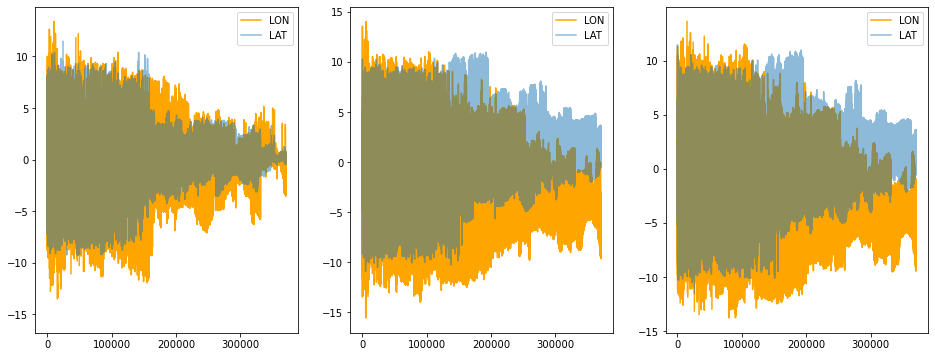

In [5]:
fig, ax= plt.subplots(ncols=3,nrows=1, figsize=(16,6))

ax[0].plot(ds2D['lon'][:, t_step]-ds3D['lon'][:, t_step], c='orange', label="LON")
ax[0].plot(ds2D['lat'][:, t_step]-ds3D['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[0].legend()
ax[1].plot(ds2D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[1].plot(ds2D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[1].legend()

ax[2].plot(ds3D['lon'][:, t_step]-dsdvm['lon'][:, t_step], c='orange', label="LON")
ax[2].plot(ds3D['lat'][:, t_step]-dsdvm['lat'][:, t_step], alpha = 0.5, label = 'LAT')
ax[2].legend()



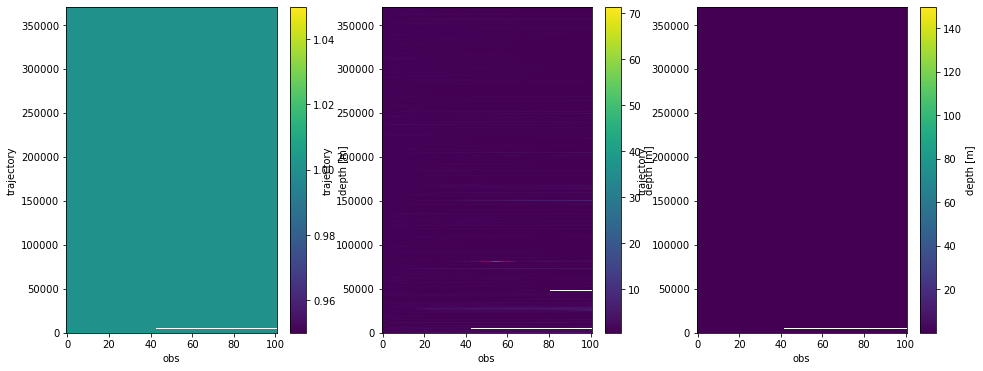

In [6]:
fig, ax= plt.subplots(ncols=3,nrows=1, figsize=(16,6))
ds2D.z.plot(ax=ax[0])

ds3D.z.plot(ax=ax[1])
dsdvm.z.plot(ax=ax[2])

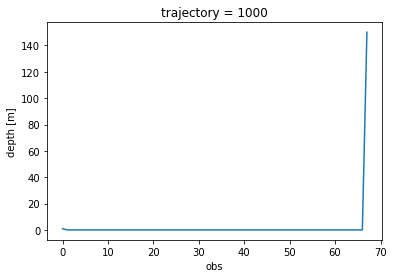

In [7]:
dsdvm.z[1000,:].plot()

In [8]:
np.max(ds3D.z.values),np.min(ds2D.z.values),np.max(ds2D.z.values)

(nan, nan, nan)